# Car Price Prediction
This notebook details the development of a machine learning model to predict car prices for Chaky's company. 

### 1. Importing libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.2', '2.2.3', '0.13.2', '3.10.0')

### 2. Load data

In [3]:
# loading the data
df = pd.read_csv("../data/Cars.csv")

In [4]:
# 
df.shape

(8128, 13)

In [5]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [6]:
# understanding the data types & non-null values of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# understanding the min and max values of the columns
df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [8]:
# getting all the unique values of  the owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [9]:
# mapping the owner values to 1,2,3,4,5 since it's not possible with label encoding
df['owner'] = df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], [1, 2, 3, 4, 5])


In [10]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [11]:
# understanding the unique values of fuel columm
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [12]:
# removing all rows with CNG and LPG because CNG and LPG use a different mileage sytem
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [13]:
df.shape

(8033, 13)

In [14]:
# removing ‚Äúkmpl‚Äù and converting column as float
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner  mileage   engine   max_power  \
0  Individual       Manual      1    23.40  1248 CC      74 bhp   
1  Individual       Manual      2    21.14  1498 CC  103.52 bhp   
2  Individual       Manual      3    17.70  1497 CC      78 bhp   
3  Individual       Manual      1    23.00  1396 CC      90 bhp   
4  Individual       Manual      1    16.10  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [15]:
# removing "CC" and converting column as float
df['engine'] = df['engine'].str.split(' ').str[0].astype(float)
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner  mileage  engine   max_power  \
0  Individual       Manual      1    23.40  1248.0      74 bhp   
1  Individual       Manual      2    21.14  1498.0  103.52 bhp   
2  Individual       Manual      3    17.70  1497.0      78 bhp   
3  Individual       Manual      1    23.00  1396.0      90 bhp   
4  Individual       Manual      1    16.10  1298.0    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [16]:
# removing "bhp" and converting column as float
df['max_power'] = df['max_power'].str.split(' ').str[0].astype(float)
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner  mileage  engine  max_power  \
0  Individual       Manual      1    23.40  1248.0      74.00   
1  Individual       Manual      2    21.14  1498.0     103.52   
2  Individual       Manual      3    17.70  1497.0      78.00   
3  Individual       Manual      1    23.00  1396.0      90.00   
4  Individual       Manual      1    16.10  1298.0      88.20   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [17]:
# taking only the brand name and removing the rest
df['name'] = df['name'].str.split().str[0]
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power                    torque  seats  
0      1    23.40  1248.0      74.00            190Nm@ 2000rpm    5.0  
1      2    21.14  1498.0     103.52       250Nm@ 1500-2500rpm    5.0  
2      3    17.70  1497.0      78.00     12.7@ 2,700(kgm@ rpm)    5.0  
3      1    23.00  1396.0      90.00  22.4 kgm at 1750-2750rpm    5.0  
4      1    16.10  1298.0      88.20     11.5@ 4,500(kgm@ rpm)    5.0

In [18]:
# not sure how torque works so doing as chaky says
df.drop(columns=['torque'], inplace=True)
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [19]:
# checking selling price of Test Drive Cars to make sure 
df[df['owner'] == 5]


name  year  selling_price  km_driven    fuel seller_type  \
4383  Volkswagen  2019        1350000       5400  Diesel      Dealer   
4950        Audi  2019        6223000       7800  Petrol      Dealer   
4951        Audi  2019        5923000      11500  Petrol      Dealer   
4952        Audi  2019        6523000      23600  Petrol      Dealer   
6220       Honda  2019        2000000      24857  Petrol      Dealer   

     transmission  owner  mileage  engine  max_power  seats  
4383       Manual      5    22.27  1498.0     108.60    5.0  
4950    Automatic      5    15.26  1798.0     187.74    5.0  
4951    Automatic      5    15.26  1798.0     187.74    5.0  
4952    Automatic      5    15.26  1798.0     187.74    5.0  
6220    Automatic      5    16.50  1799.0     139.46    5.0

In [20]:
# deleting samples for test drive cars
df = df[df['owner'] != 5]
df.head()

name  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [21]:
df.fuel.unique(), df.seller_type.unique(), df.transmission.unique()

(array(['Diesel', 'Petrol'], dtype=object),
 array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object))

In [22]:
# performing label encoding of the seller_type, fuel and transmission
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])


In [23]:
df.head()

name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0   Maruti  2014         450000     145500     0            1             1   
1    Skoda  2014         370000     120000     0            1             1   
2    Honda  2006         158000     140000     1            1             1   
3  Hyundai  2010         225000     127000     0            1             1   
4   Maruti  2007         130000     120000     1            1             1   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

### 3. EDA (Exploratory Data Analysis)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 815.3+ KB


In [25]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

#### 3.1 Univariate Analysis

**Histogram**

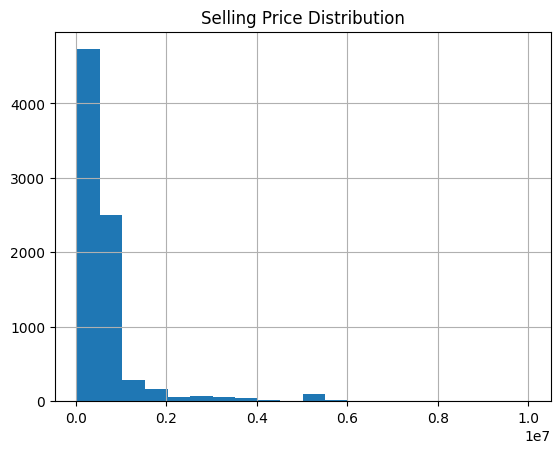

In [26]:
df['selling_price'].hist(bins=20)
plt.title('Selling Price Distribution')
plt.show()


**Boxplot**

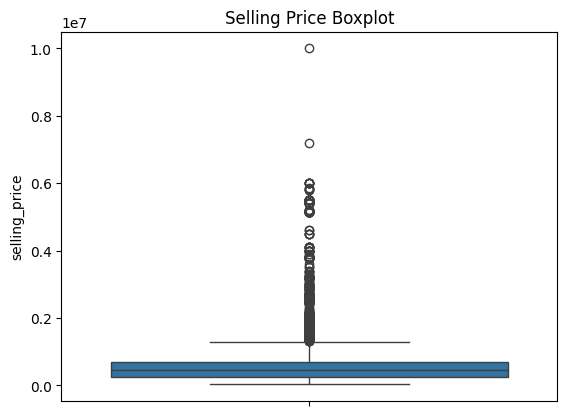

In [27]:
# to find out any outliers, using boxplot to identify them
sns.boxplot(df['selling_price'])
plt.title('Selling Price Boxplot')
plt.show()

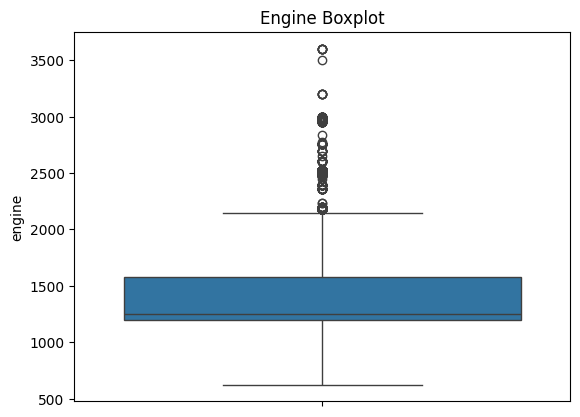

In [28]:
sns.boxplot(df['engine'])
plt.title('Engine Boxplot')
plt.show()

**Distribution Plot**

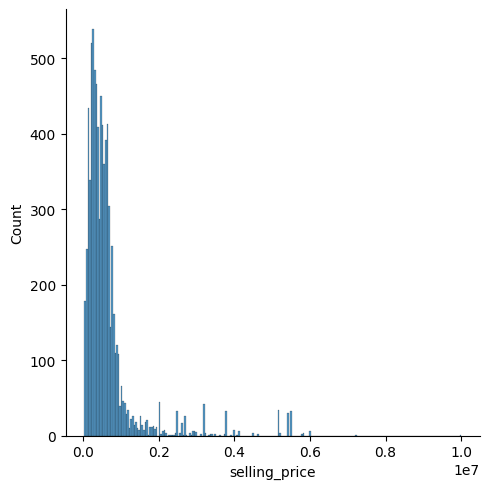

In [29]:
#distribution plot for selling price
sns.displot(data = df, x = 'selling_price')

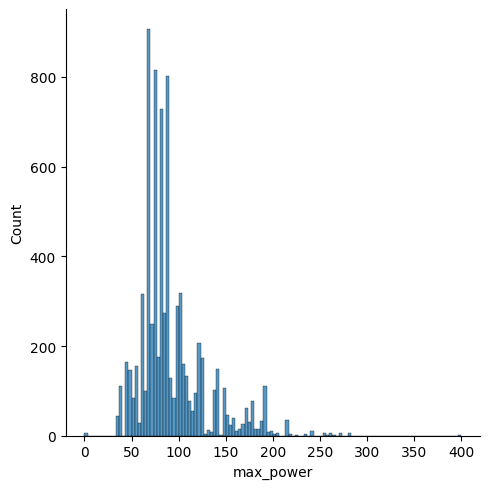

In [30]:
#distribution plot for max power
sns.displot(data = df, x = 'max_power')

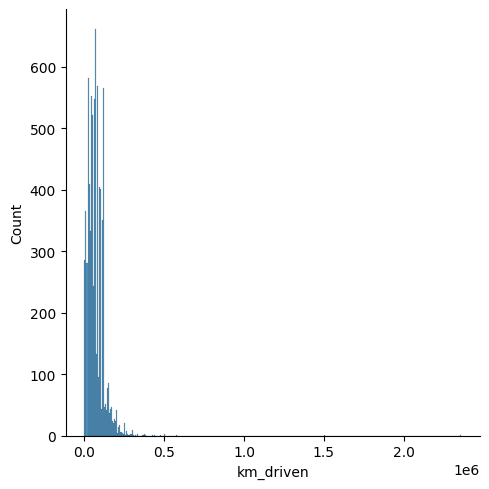

In [31]:
#distribution plot for km driven
sns.displot(data = df, x = 'km_driven')

#### 3.2 Multivariate Analysis

**Boxplot**

Text(0.5, 0, 'Selling Price')

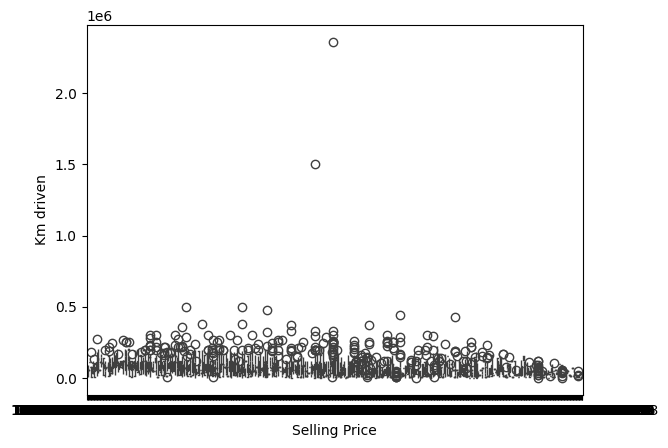

In [32]:
sns.boxplot(x = np.log(df["selling_price"]), y = df["km_driven"])
plt.ylabel("Km driven")
plt.xlabel("Selling Price")

**Scatterplot**

<Axes: xlabel='year', ylabel='km_driven'>

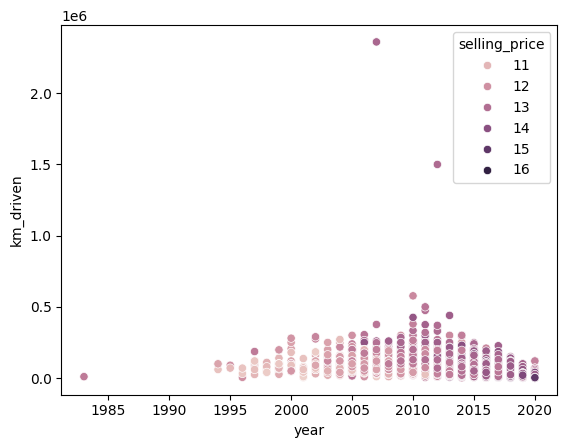

In [33]:
sns.scatterplot(x = df['year'], y = df['km_driven'], hue=(np.log(df['selling_price'])))

**Correlation Matrix**

In [34]:
# creating a copy of the dataset and removing name in order to visualize in the correlation matrix
dfcopy = df.copy()
dfcopy.drop(['name'], axis='columns', inplace=True)

<Axes: >

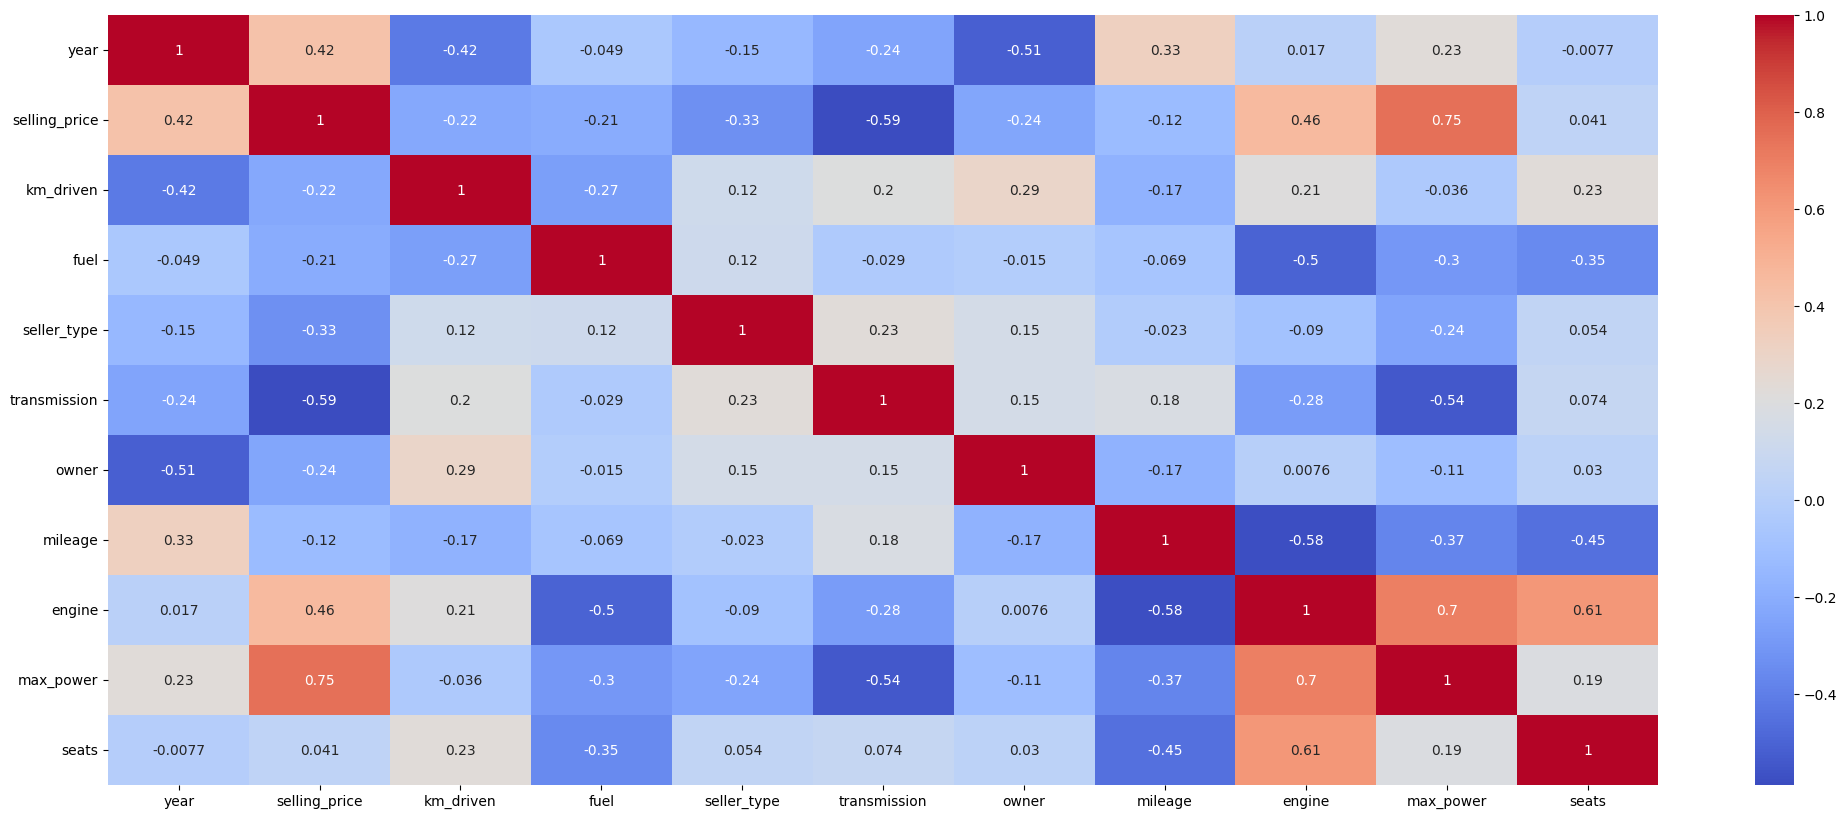

In [35]:
#correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(dfcopy.corr(), annot=True, cmap='coolwarm')

converting the label selling price into discrete variable by simply putting the price in a bucket of 0, 1, 2, 3,

In [36]:
bins = [0, 260000, 450000, 680000, float('inf')]
labels = [0, 1, 2, 3]
df['price_category'] = pd.cut(df['selling_price'], bins=bins, labels=labels)

In [37]:
# dropping the selling price from the dataset
df.drop(columns=['selling_price'], inplace= True)

In [38]:
df['price_category'].unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

### 4. Feature Selection

In [39]:
# from the correlation matrix, we can see that  max_power, engine, and year have the highest correlation. 
# let's include 'mileage' as it could significantly influence the car's value.

X = df[['engine', 'max_power', 'mileage', 'year']]

# 
y = df['price_category']
X.shape, y.shape

((8028, 4), (8028,))

In [40]:
y.head

<bound method NDFrame.head of 0       1
1       1
2       0
3       0
4       0
       ..
8123    1
8124    0
8125    1
8126    1
8127    1
Name: price_category, Length: 8028, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]>

In [41]:
# check null or missing values for our features
X.isnull().sum()

engine       214
max_power    208
mileage      214
year           0
dtype: int64

#### Train Test Split

In [42]:
# splitting the data using train_test_split before adding the missing/null values
# i have splited the data in 80/20 ratio, 80 for training and 20 for testing

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6422, 4), (1606, 4), (6422,), (1606,))

### 5. Preprocessing

In [43]:
# chekcing null values in the X_train data 
X_train.isnull().sum()

engine       171
max_power    165
mileage      171
year           0
dtype: int64

In [44]:
# chekcing null values in the X_test data 
X_test.isnull().sum()

engine       43
max_power    43
mileage      43
year          0
dtype: int64

<Axes: xlabel='engine', ylabel='Count'>

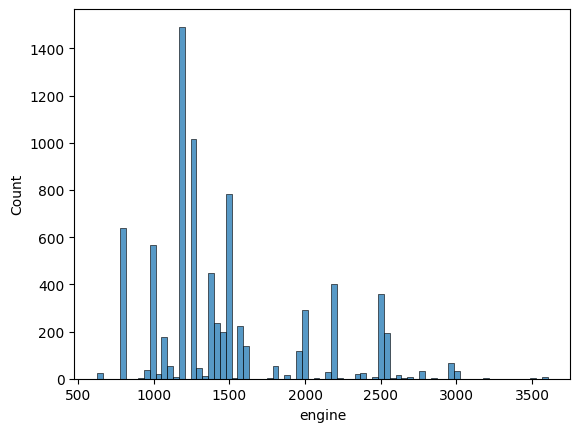

In [45]:
# checking the skewness of the features to fill in the null values using histplot

sns.histplot(data=df, x='engine')


In [46]:
# from the diagram above, it is a positively skewed distribution. To confirm it, we use scipy.stats
from scipy.stats import skew

skewness = skew(df['engine'].dropna())
print(f"Skewness: {skewness}")

Skewness: 1.1253113204700755


<Axes: xlabel='year', ylabel='Count'>

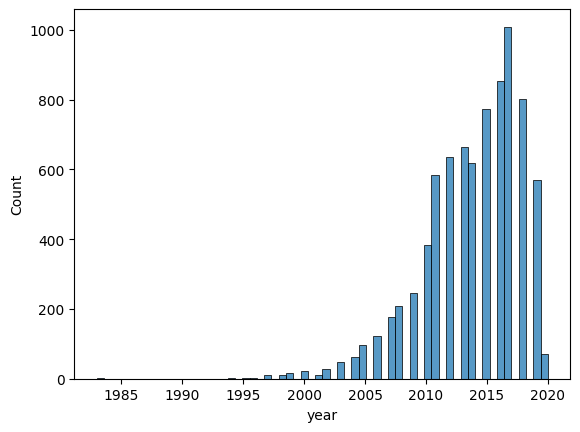

In [47]:
sns.histplot(data=df, x='year')

<Axes: xlabel='mileage', ylabel='Count'>

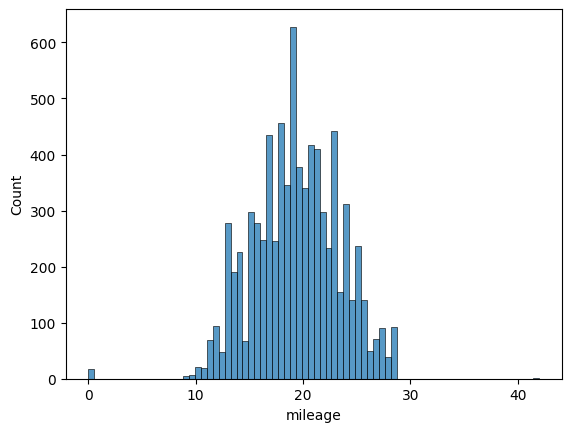

In [48]:
sns.histplot(data=df, x='mileage')

In [49]:
# from the diagram, it is an almost normal but slightly negative skew as we have few data near 0
from scipy.stats import skew

skewness = skew(df['mileage'].dropna())
print(f"Skewness: {skewness}")


Skewness: -0.17324819807259195


<Axes: xlabel='max_power', ylabel='Count'>

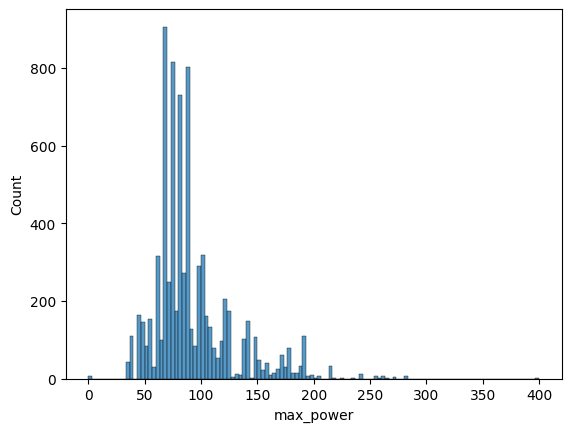

In [50]:
sns.histplot(data=df, x='max_power')

In [51]:
# from the diagram above, it is a positively skewed distribution.
skewness = skew(df['max_power'].dropna())
print(f"Skewness: {skewness}")

Skewness: 1.6196610207802749


In [52]:
# after analysis of the graph, we fill the missing values with median for the columns

# filling missing values in X_train with its median
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

# filling missing values in X_test with the median of X_train
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)


In [53]:
X_train['engine'].median(), X_train['mileage'].median(), X_train['max_power'].median()

(np.float64(1248.0), np.float64(19.3), np.float64(82.85))

In [54]:
# check for missing values
X_train.isnull().sum(), X_test.isnull().sum(), y_train.isnull().sum(), y_test.isnull().sum()

(engine       0
 max_power    0
 mileage      0
 year         0
 dtype: int64,
 engine       0
 max_power    0
 mileage      0
 year         0
 dtype: int64,
 np.int64(0),
 np.int64(0))

In [55]:
# we need to ensure that the number of samples in the feature matrices (X_train, X_test) matches
assert(X_test.shape[0] == y_test.shape[0])

In [56]:
assert(X_train.shape[0] == y_train.shape[0])

In [57]:
X_train

engine  max_power  mileage  year
2982   799.0      53.30    25.17  2016
2430   796.0      47.30    22.74  2013
6294  1248.0      82.85    19.30  2009
6255  2179.0     153.86    17.60  2018
4253  1998.0      68.00    14.80  1999
...      ...        ...      ...   ...
5293  1197.0      78.90    20.36  2013
5461   998.0      67.04    20.51  2016
865   1248.0      88.76    20.77  2015
7701  2487.0     214.56    22.37  2019
7366  1197.0      83.10    21.40  2018

[6422 rows x 4 columns]

In [58]:
df.describe()

year     km_driven         fuel  seller_type  transmission  \
count  8028.000000  8.028000e+03  8028.000000  8028.000000   8028.000000   
mean   2013.815521  6.977314e+04     0.451794     0.890010      0.869706   
std       4.030836  5.664419e+04     0.497702     0.395861      0.336648   
min    1983.000000  1.000000e+03     0.000000     0.000000      0.000000   
25%    2011.000000  3.500000e+04     0.000000     1.000000      1.000000   
50%    2015.000000  6.000000e+04     0.000000     1.000000      1.000000   
75%    2017.000000  9.800000e+04     1.000000     1.000000      1.000000   
max    2020.000000  2.360457e+06     1.000000     2.000000      1.000000   

             owner      mileage       engine    max_power        seats  
count  8028.000000  7814.000000  7814.000000  7820.000000  7814.000000  
mean      1.458022    19.391962  1462.914640    91.819726     5.421551  
std       0.715283     4.001972   504.759742    35.804513     0.963125  
min       1.000000     0.000000   624.000000     0.000000     2.000000  
25%       1.000000    16.780000  1197.000000    68.850000     5.000000  
50%       1.000000    19.300000  1248.000000    82.400000     5.000000  
75%       2.000000    22.320000  1582.000000   102.000000     5.000000  
max       4.000000    42.000000  3604.000000   400.000000    14.000000

#### Scaling

In [59]:
# to ensure faster convergence, we scale the features usint StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [60]:
# saving scaler model for the webapp
import joblib
joblib.dump(scaler, "../app/model/scaler.dump")

['../app/model/scaler.dump']

### Custom Linear Regression Model

In [61]:
#experiment tracking
import mlflow
print(mlflow.__version__)
import os
from mlflow import MlflowClient

mlflow_url = 'https://mlflow.ml.brain.cs.ait.ac.th/'
mlflow.set_tracking_uri(mlflow_url)

os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"
# # This the dockerized method.
# # We build two docker containers, one for python/jupyter and another for mlflow.
# # The url `mlflow` is resolved into another container within the same composer.
# mlflow.set_tracking_uri("http://localhost:7070")
# # In the dockerized way, the user who runs this code will be `root`.
# # The MLflow will also log the run user_id as `root`.
# # To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "st125168-a3"
# mlflow.create_experiment(name="car-price-125168")  #create if you haven't create
mlflow.set_experiment(experiment_name="st125168--a3")

2.20.1


<Experiment: artifact_location='mlflow-artifacts:/403282937089341554', creation_time=1742923010692, experiment_id='403282937089341554', last_update_time=1742923010692, lifecycle_stage='active', name='st125168--a3', tags={}>

In [62]:
import time
from sklearn.inspection import permutation_importance
class LogisticRegression:
    
    def __init__(self, method, alpha, penalty="none", l=0.0, k=None, n=None, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.l = l  # for ridge regression only
        self.penalty = penalty

        if self.penalty == "ridge":
            self.regularization = RidgePenalty(self.l)
        else:
            self.regularization = NoPenalty(self.l)
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m + self.regularization(self.W)
        error = h - Y
        grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        return loss, grad

    def softmax(self, theta_t_x):
    # Subtract max value per row to prevent overflow
        z = theta_t_x - np.max(theta_t_x, axis=1, keepdims=True)
        exp_scores = np.exp(z)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
    
    # classification report from scratch
    def accuracy_score(self, y_test, y_pred):
        return np.sum(y_test == y_pred) / len(y_test)
    
    def precision(self, y_test, y_pred, c):
        TP = np.sum((y_test == c) & (y_pred == c))
        FP = np.sum((y_test != c) & (y_pred == c))
        if TP + FP == 0:
            return 0
        else:
            return TP / (TP + FP)
        
    def recall(self, y_test, y_pred, c):
        TP = np.sum((y_test == c) & (y_pred == c))
        FN = np.sum((y_test == c) & (y_pred!= c))
        if TP + FN == 0:
            return 0
        else:
            return TP / (TP + FN)
        
    def f1_score(self, y_test, y_pred, c):
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * (precision * recall) / (precision + recall)
        
    def macro_precision(self, y_test, y_pred):
        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.mean(precisions)
    
    def macro_recall(self, y_test, y_pred):
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.mean(recalls)
    
    def macro_f1_score(self, y_test, y_pred):
        f1_scores = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.mean(f1_scores)
    
    def weighted_precision(self, y, y_pred):
        class_counts = [np.count_nonzero(y == c) for c in range(self.k)]
        precisions = [class_counts[c] / len(y) * self.precision(y, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)

    def weighted_recall(self, y, y_pred):
        class_counts = [np.count_nonzero(y == c) for c in range(self.k)]
        recalls = [class_counts[c] / len(y) * self.recall(y, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)

    def weighted_f1(self, y, y_pred):
        class_counts = [np.count_nonzero(y == c) for c in range(self.k)]
        f1s = [class_counts[c] / len(y) * self.f1_score(y, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)
    
    def my_classification_report(self, y_test, y_pred):
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        # Calculate per-class metrics
        report = [
            [
                self.precision(y_test, y_pred, c),
                self.recall(y_test, y_pred, c),
                self.f1_score(y_test, y_pred, c)
            ] for c in range(self.k)
        ]

        # Add accuracy
        acc = self.accuracy_score(y_test, y_pred)
        report.append(["", "", round(acc, 2)])


        # Add macro metrics
        report.append([
            self.macro_precision(y_test, y_pred),
            self.macro_recall(y_test, y_pred),
            self.macro_f1_score(y_test, y_pred)
        ])

        # Add weighted metrics
        report.append([
            self.weighted_precision(y_test, y_pred),
            self.weighted_recall(y_test, y_pred),
            self.weighted_f1(y_test, y_pred)
        ])

        rounded_report = [
            [round(cell, 2) if isinstance(cell, (int, float)) else cell for cell in row]
            for row in report
        ]
        return pd.DataFrame(rounded_report, index=idx, columns=cols)
    
    def plot_feature_importance(self):
        feature_names = X.columns
        feature_importance = permutation_importance(self, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)

        # Plot feature importance
        plt.figure(figsize=(8, 5))
        plt.barh(feature_names, feature_importance['importances_mean'], color='skyblue', edgecolor='black')
        plt.xlabel("Feature Importance")
        plt.ylabel("Features")
        plt.title("Feature Importance in Custome Logistic Regression")
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.show()

        

In [63]:
class RidgePenalty:
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class NoPenalty():
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return 0.0
        
    def derivation(self, theta):
        return 0.0
    
class Ridge(LogisticRegression):
    def __init__(self, reg, method, alpha, k, n, l):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k=k, method=method, alpha=alpha, n=n)

class Normal(LogisticRegression):
    def __init__(self, reg, method, alpha, k, n, l):
        regularization = NoPenalty(l)
        super().__init__(regularization, k=k, method=method, alpha=alpha, n=n)


In [64]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [65]:
y_train.shape

(6422,)

In [66]:
# one-hot encode the class labels using np.eye()
k = 4  # number of classes
Y_train_encoded = np.eye(k)[y_train]

In [67]:
model = LogisticRegression(
    penalty="ridge",      
    l=0.1,                 
    method="batch",
    alpha=0.01,
    k=Y_train_encoded.shape[1],
    n=X_train.shape[1]
)

model.fit(X_train, Y_train_encoded)
y_pred = model.predict(X_test)

# Custom classification report
print("\nCustom Classification Report:")
print(model.my_classification_report(y_test, y_pred))

# Compare with sklearn
from sklearn.metrics import classification_report
print("\nSklearn Classification Report:")
print(classification_report(y_test, y_pred))

Loss at iteration 0 2.538526597442769
Loss at iteration 500 136.97635779800174
Loss at iteration 1000 121.85322472762392
Loss at iteration 1500 123.90394343597623
Loss at iteration 2000 116.63202194802906
Loss at iteration 2500 136.89632998682345
Loss at iteration 3000 121.84243216850103
Loss at iteration 3500 123.90248572781988
Loss at iteration 4000 116.63182506341121
Loss at iteration 4500 136.8963033946975
time taken: 1.759338140487671

Custom Classification Report:
         precision recall  f1-score
0             0.66   0.57      0.61
1             0.48   0.53      0.51
2             0.26   0.18      0.21
3             0.52   0.66      0.58
accuracy                       0.50
macro         0.48   0.49      0.48
weighted      0.49    0.5      0.49

Sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       411
           1       0.48      0.53      0.51       456
           2       0.26      0.18      0.2

On comparing with sklearn classification report and my custom classification report, they are the same. In the classification report, Support refers to the number of actual occurrences (samples) of each class in the dataset. It provides important information about the distribution of classes and helps interpret the metrics like precision, recall, and F1-score.

In [74]:
# let's find the best model. hypertuning and modeling 
from itertools import product
from mlflow.models import infer_signature

methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
lambdas = [0.0, 0.001, 0.01, 0.1, 1.0]
penalties = ["ridge", "none"] 

best_accuracy = -1
best_model = None
best_params = None
best_mlrun_id = None
# all combinations of the parameters
for method, alpha, l, p in product(methods, alphas, lambdas, penalties):
    run_name = f"method-{method}-alpha-{alpha}-lambda-{l}-penalty-{p}"

    with mlflow.start_run(run_name=run_name, nested=True):
            params = {
                "penalty": p,
                "method": method,
                "alpha": alpha,
                "k": Y_train_encoded.shape[1],
                "n": X_train.shape[1],
                "l": l
            }

            model = LogisticRegression(**params)
            model.fit(X_train, Y_train_encoded)
            y_pred = model.predict(X_test)

            acc = model.accuracy_score(y_test, y_pred)
            macro_f1 = model.macro_f1_score(y_test, y_pred)
            macro_precision = model.macro_precision(y_test, y_pred)
            macro_recall = model.macro_recall(y_test, y_pred)

            # Log summary metrics to MLflow
            mlflow.log_metric("accuracy", round(acc, 4))
            mlflow.log_metric("macro_f1", round(macro_f1, 4))
            mlflow.log_metric("macro_precision", round(macro_precision, 4))
            mlflow.log_metric("macro_recall", round(macro_recall, 4))

            mlflow.log_params({"method": method, "alpha": alpha, "lambda": l})

            joblib.dump(model, "model.pkl")
            mlflow.log_artifact("model.pkl")

            signature = infer_signature(X_train, model.predict(X_train))
            mlflow.sklearn.log_model(model, "model", signature=signature)

            if acc > best_accuracy:
                best_accuracy = acc
                best_model = model
                best_params = params
                best_mlrun_id = mlflow.active_run().info.run_id


if best_mlrun_id:
    uri = f"runs:/{best_mlrun_id}/model"
    model_name = "st125168-a3-model"

    model_v = mlflow.register_model(uri, model_name)
    print(f"\nRegistered Model: {model_name} (Version: {model_v.version})")

    ml_client = MlflowClient()
    latest_v = ml_client.get_latest_versions(model_name, stages=["None"])[0].version

    ml_client.transition_model_version_stage(name=model_name, version=latest_v, stage="Staging")
    print(f"Model {latest_v} is now in Staging.")


Loss at iteration 0 1.36841282915084
Loss at iteration 500 8.134848551159756
Loss at iteration 1000 7.225678463745524
Loss at iteration 1500 8.246754394053083
Loss at iteration 2000 8.077263157070274
Loss at iteration 2500 8.134848551159747
Loss at iteration 3000 7.225678463745533
Loss at iteration 3500 8.24675439405305
Loss at iteration 4000 8.077263157070265
Loss at iteration 4500 8.134848551159743
time taken: 1.8699519634246826
üèÉ View run method-batch-alpha-0.01-lambda-0.0-penalty-ridge at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/403282937089341554/runs/9f168354072f410fb77830b1002c7010
üß™ View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/403282937089341554
Loss at iteration 0 1.5544063685516873
Loss at iteration 500 12.373421285650117
Loss at iteration 1000 12.43847915172522
Loss at iteration 1500 12.673496537409152
Loss at iteration 2000 11.9819851169449
Loss at iteration 2500 12.373421285650446
Loss at iteration 3000 12.438479151725259
Loss at 

Registered model 'st125168-a3-model' already exists. Creating a new version of this model...
2025/03/25 20:27:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st125168-a3-model, version 2
Created version '2' of model 'st125168-a3-model'.



Registered Model: st125168-a3-model (Version: 2)
Model 2 is now in Staging.


In [76]:
# verified the best model from MLFlow 
best_model = LogisticRegression(method="sto", alpha=0.01, penalty="none", l=0.1, k= Y_train_encoded.shape[1],n= X_train.shape[1] )
best_model.fit(X_train, Y_train_encoded)

Loss at iteration 0 1.7334183989193015
Loss at iteration 500 1.217539076894859
Loss at iteration 1000 0.9605085194212558
Loss at iteration 1500 0.3988046290495744
Loss at iteration 2000 1.5978070189972615
Loss at iteration 2500 1.5731358231677497
Loss at iteration 3000 1.238689221816544
Loss at iteration 3500 2.7545960696396916
Loss at iteration 4000 1.5038928919282872
Loss at iteration 4500 0.7611799179661338
time taken: 0.12543487548828125


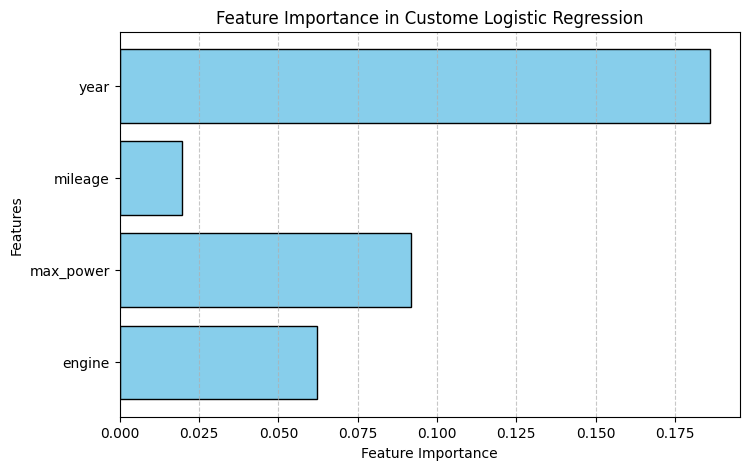

In [77]:
best_model.plot_feature_importance()

In [80]:
# using my custom classification report
y_pred = best_model.predict(X_test)
print("\nCustom Classification Report:")
print(best_model.my_classification_report(y_test, y_pred))



Custom Classification Report:
         precision recall  f1-score
0             0.58   0.95      0.72
1             0.64    0.1      0.17
2             0.44   0.24      0.31
3             0.56   0.98      0.71
accuracy                       0.56
macro         0.56   0.57      0.48
weighted      0.56   0.56      0.47


### 7. Inference

In [81]:
import cloudpickle

with open("../app/model/a3_car_price.pkl", "wb") as f:
    cloudpickle.dump(best_model, f)

In [82]:
# save model for the webapp to use
with open("../app/model/a3_car_price.pkl", "rb") as f:
    loaded_model = cloudpickle.load(f)

In [83]:
car1 = pd.DataFrame([[1226, 108, 12 ,2016]], columns=[ 'engine', 'max_power', 'mileage', 'year'])
car2 = pd.DataFrame([[1248, 74, 23.4 ,2012]], columns=[ 'engine', 'max_power', 'mileage', 'year'])

In [84]:
scalermodel = joblib.load("../app/model/scaler.dump")

fit_car1 = scalermodel.transform(car1)
fit_car2 = scalermodel.transform(car2)

carprice1 = loaded_model.predict(fit_car1)
carprice2 = loaded_model.predict(fit_car2)

print("Predicted price of Car 1:", carprice1[0])
print("Predicted price of Car 2:", carprice2[0])

Predicted price of Car 1: 3
Predicted price of Car 2: 0


In this project, we developed and evaluated a Car Price Category Prediction Model using logistic regression with optional Ridge (L2) regularization. We performed hyperparameter tuning across different learning rates, regularization strengths, and optimization methods (batch, minibatch, and stochastic) to identify the best configuration.

After testing various combinations, the best model was selected based on accuracy, macro precision, macro recall and macro F1-score, and was logged and tracked using MLflow. Additionally, we created unit tests to ensure the model behaves as expected, and automated the testing and deployment process using GitHub Actions.